# Bluebikes Usage Modeling
*Finnley Autumn Rogers* | 2024-08-23

Utilizing bluebikes usage data sourced from kraggle, I want to try to build a reasonable model of bluebikes usage at different time granualities (hour, day, week). The available data is from 2019 and 2020, so some of it will be heavily affected by covid-19 shutdowns. I'll examine what I have available first and make a decision on what I want to do with the data after that. 

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [53]:
bb_2019 = pd.read_csv("data/bluebikes_tripdata_2019.csv")

# this will be affected by covid, potentially use the first part of this to test forecasting
bb_2020 = pd.read_csv("data/bluebikes_tripdata_2020.csv")

/var/folders/90/jnz1wg4x0bv_6ys9t9zfk_p40000gn/T/ipykernel_14213/2137032261.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  bb_2020 = pd.read_csv("data/bluebikes_tripdata_2020.csv")


In [21]:
bb_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522771 entries, 0 to 2522770
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         int64  
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           int64  
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
 15  year                     int64  
 16  month                    int64  
dtypes: float64(4), int64(8), object(5)
memory usage: 327.2+ MB


In [22]:
bb_2019.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month
0,790,2019-12-01 00:01:25.3240,2019-12-01 00:14:35.3350,370,Dartmouth St at Newbury St,42.350961,-71.077828,33,Kenmore Square,42.348706,-71.097009,5133,Subscriber,1950,1,2019,12
1,166,2019-12-01 00:05:42.8610,2019-12-01 00:08:29.3830,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,2653,Subscriber,1993,1,2019,12


In [56]:
bb_2019.starttime = pd.to_datetime(bb_2019.starttime)
bb_2019.stoptime = pd.to_datetime(bb_2019.stoptime)

In [54]:
bb_2020.starttime = pd.to_datetime(bb_2020.starttime)
bb_2020.stoptime = pd.to_datetime(bb_2020.stoptime)

In [24]:
# full year of data, good
print(min(bb_2019.starttime))
print(max(bb_2019.starttime))

2019-01-01 00:09:13.798000
2019-12-31 23:57:49.672000


In [57]:
# break down into hour, day of week, and month
bb_2019['hour'] = bb_2019.starttime.dt.hour
bb_2019['day_of_week'] = bb_2019.starttime.dt.day_of_week
bb_2019['month'] = bb_2019.starttime.dt.month

In [59]:
# break down into hour, day of week, and month
bb_2020['hour'] = bb_2020.starttime.dt.hour
bb_2020['day_of_week'] = bb_2020.starttime.dt.day_of_week
bb_2020['month'] = bb_2020.starttime.dt.month
bb_2020['startdate'] = bb_2020.starttime.dt.date

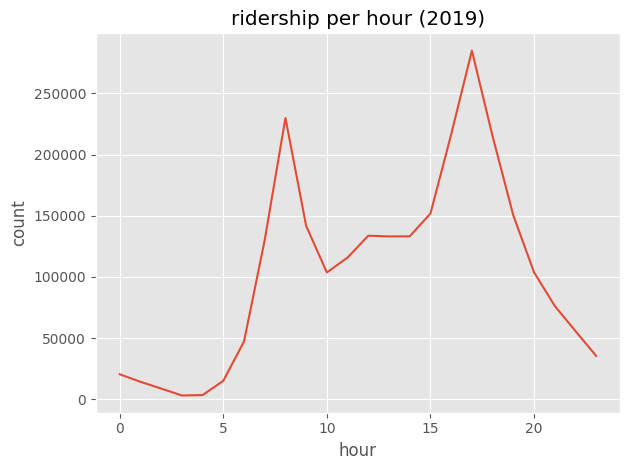

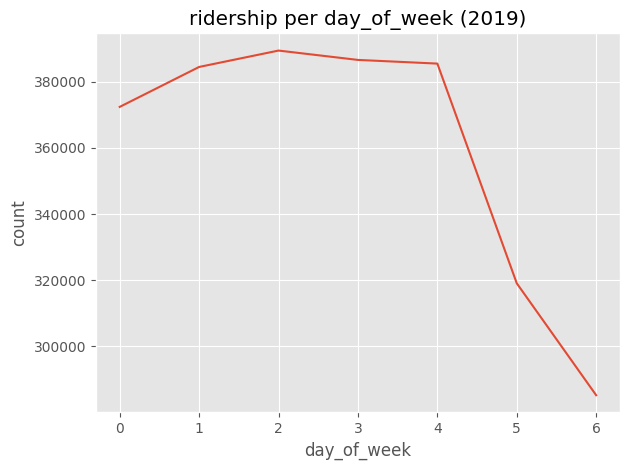

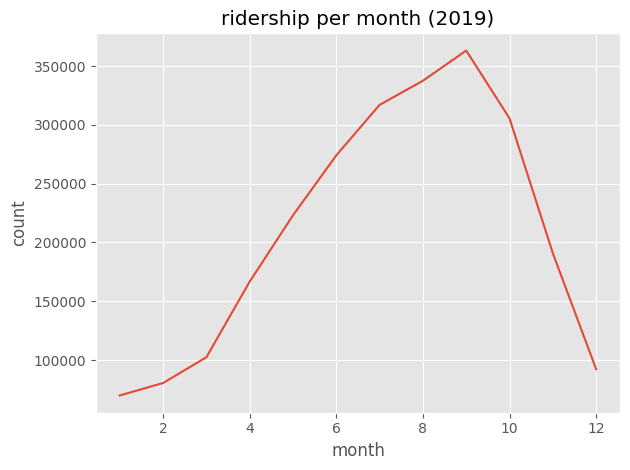

In [60]:
# make plots for each of the granularities
for gran in ['hour', 'day_of_week', 'month']:
    temp_gb = bb_2019[[gran, 'starttime']].groupby(gran).count().reset_index()

    fig,ax = plt.subplots(1,1,tight_layout=True)
    ax.plot(temp_gb[gran], temp_gb.starttime)

    ax.set_title(f"ridership per {gran} (2019)")
    
    ax.set_ylabel("count")
    ax.set_xlabel(gran)

    plt.savefig(f"outputs/{gran}_ridership_2019.png", dpi = 200)
    plt.show()

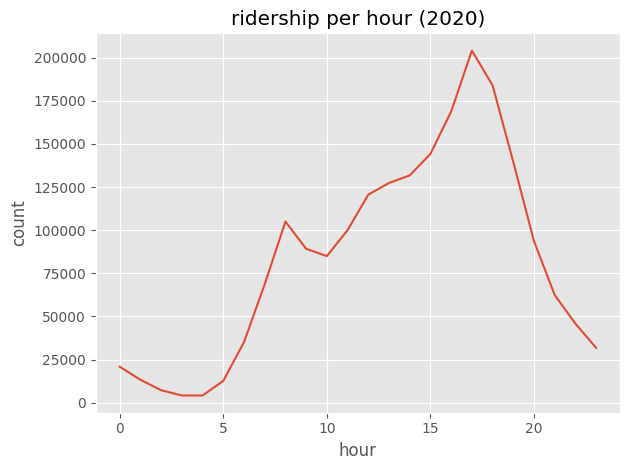

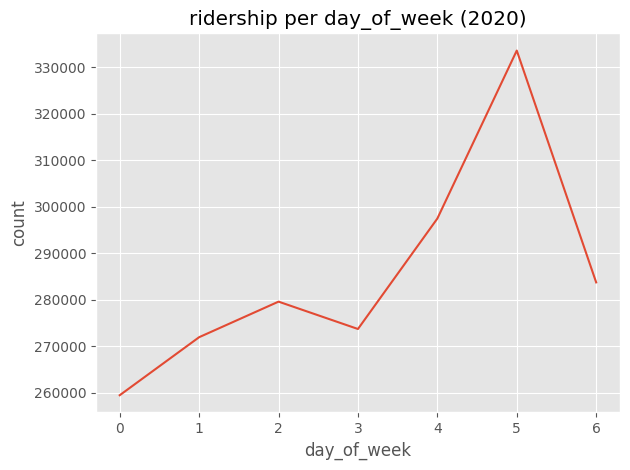

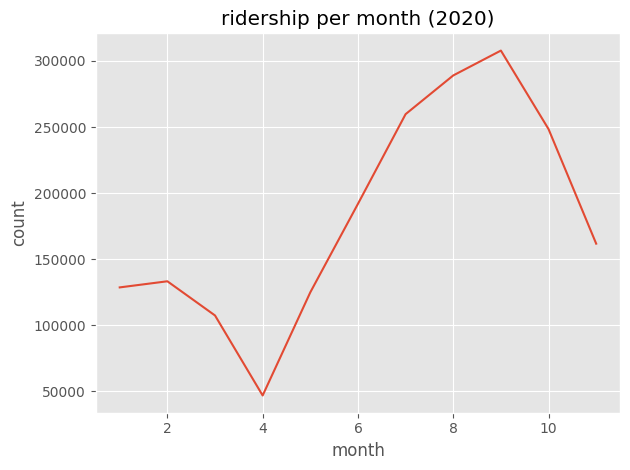

In [61]:
# make plots for each of the granularities
for gran in ['hour', 'day_of_week', 'month']:
    temp_gb = bb_2020[[gran, 'starttime']].groupby(gran).count().reset_index()

    fig,ax = plt.subplots(1,1,tight_layout=True)
    ax.plot(temp_gb[gran], temp_gb.starttime)

    ax.set_title(f"ridership per {gran} (2020)")
    
    ax.set_ylabel("count")
    ax.set_xlabel(gran)

    plt.savefig(f"outputs/{gran}_ridership_2020.png", dpi = 200)
    plt.show()

Lets start with modeling the ridership per day of the week. We can plot ridership per day over the year below to get a better idea of what that may look like.

In [63]:
bb_2019['startdate'] = bb_2019.starttime.dt.date

In [64]:
bb_2019.head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month,hour,day_of_week,startdate
0,790,2019-12-01 00:01:25.324,2019-12-01 00:14:35.335,370,Dartmouth St at Newbury St,42.350961,-71.077828,33,Kenmore Square,42.348706,-71.097009,5133,Subscriber,1950,1,2019,12,0,6,2019-12-01
1,166,2019-12-01 00:05:42.861,2019-12-01 00:08:29.383,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,2653,Subscriber,1993,1,2019,12,0,6,2019-12-01


In [65]:
daily_ridership_2019 = bb_2019[['starttime','startdate']].groupby('startdate').count().reset_index()

In [66]:
daily_ridership_2019.head(2)

,startdate,starttime
0,2019-01-01,1305
1,2019-01-02,2632


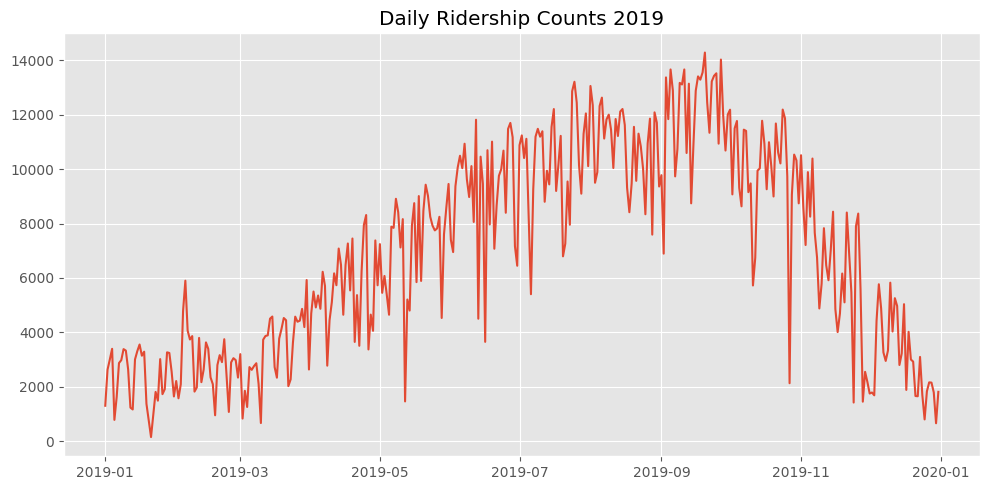

In [71]:
fig,ax=plt.subplots(1,1,tight_layout=True, figsize = (10,5))

ax.plot(daily_ridership_2019.startdate, daily_ridership_2019.starttime)

ax.set_title("Daily Ridership Counts 2019")

plt.savefig("outputs/daily_ridership_2019.png")

plt.show()

In [68]:
daily_ridership_2020 = bb_2020[['starttime','startdate']].groupby('startdate').count().reset_index()

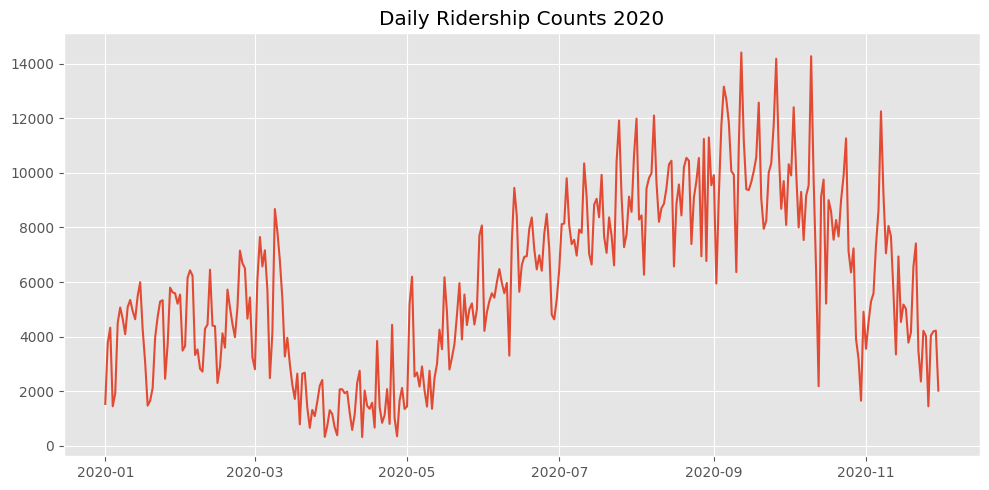

In [72]:
fig,ax=plt.subplots(1,1,tight_layout=True, figsize = (10,5))

ax.plot(daily_ridership_2020.startdate, daily_ridership_2020.starttime)

ax.set_title("Daily Ridership Counts 2020")

plt.savefig("outputs/daily_ridership_2020.png")
plt.show()

For this, I'll combine all 2019 data and 2020 up to but not including March, and split the last ~20% of the days for forecasting

In [73]:
daily_ridership_2020.head(2)

,startdate,starttime
0,2020-01-01,1536
1,2020-01-02,3771


In [76]:
daily_ridership_2019.head(2)

,startdate,starttime
0,2019-01-01,1305
1,2019-01-02,2632
